## Shopify Data Challenge - Winter 2021 
##### Question 1

In [1]:
# package and data imports
import pandas as pd
import matplotlib.pyplot as pt

df = pd.read_csv('shopify_data.csv')

In [2]:
# view the structure of the data
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [3]:
# current AOV calculation
aov_curr = df.order_amount.sum()/df.order_id.nunique()
print('The current (naive) AOV is: ${}'.format(round(aov_curr,2)))

The current (naive) AOV is: $3145.13


In [4]:
# add a shoe price column
df['shoe_price'] = df.order_amount/df.total_items

#### PART A

The current method of computing AOV is very simplistic, and uses the very basic definition of 'average' in mathematics. That is it takes the sum of all order amounts, and divides it by the number of orders. 

Although this value is beneficial, it is not robust to outliers and does not give consideration to the data distribution. We know that each of the 100 stores only sells 1 product, and because Shopify is used by a proportionately large number of small business, we expect their consumer base to be ordinary shoppers (as opposed to other retailers or consumers i.e. B2B sales). Ordinary consumers typically only buy a few shoes at a time, particularly if it's only of 1 type (i.e. it's their favourite shoe). Thus orders which have large quantities might not be representative of the average consumer.

Examining further:

In [5]:
sorted(df.total_items.unique())

[1, 2, 3, 4, 5, 6, 8, 2000]

In [6]:
df.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

As noted above, we expect that consumers only buy a few shoes in each order so total items < 10 is a reasonable target. However, there are 17 orders with exactly 2000 items in each. This is extremely out of the ordinary as there are NO other orders with nearly as much items, and it is unlikely different consumers would coincidentally buy exactly 2000 shoes in their orders. 

Looking at these orders closer:

In [7]:
df_2000 = df.loc[df.total_items == 2000].sort_values(by='created_at')
df_2000.head(17)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0


Looking at these orders, it seems that there are 17 identical orders made by the same user at the same shop, using the same payment method. All orders are made at 4\:00\:00, and some are even made on the same date. 

Compared to the other orders, these orders are outliers in all aspects. It might be that there is a customer (i.e. a wholesaler) who has indeed made all these purchases, or somehow these orders were duplicated several times (i.e. not all orders are accurate). Either way, these orders warrant further investigation to determine if they are accurate.

As mentioned before, if they are in fact all honest orders, it is not representative of the average number of items in each order. Thus, it might be valuable to remove all of these transactions so that the data isn't completely skewed.

(array([4983.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          17.]),
 array([1.0000e+00, 2.0090e+02, 4.0080e+02, 6.0070e+02, 8.0060e+02,
        1.0005e+03, 1.2004e+03, 1.4003e+03, 1.6002e+03, 1.8001e+03,
        2.0000e+03]),
 <BarContainer object of 10 artists>)

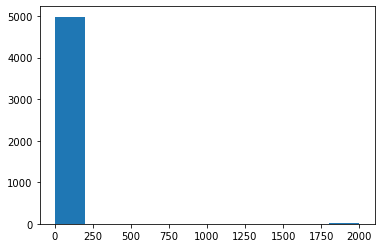

In [8]:
# plot with all orders
pt.hist(df.total_items)

(array([1.830e+03, 1.832e+03, 9.410e+02, 0.000e+00, 2.930e+02, 7.700e+01,
        0.000e+00, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

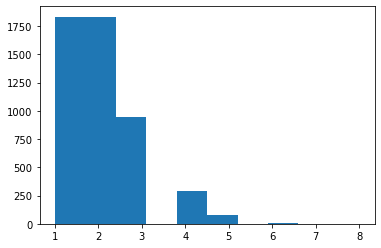

In [9]:
# plot with all orders minus the 2000 total amount orders
df_minus_2000 = df.loc[df.total_items < 2000]
pt.hist(df_minus_2000.total_items)

Since order amount = price * quantity, price could also affect the AOV calculation. We computed a price column above, so let's do a similar analysis:

In [10]:
sorted(df.shoe_price.unique())

[90.0,
 94.0,
 101.0,
 111.0,
 112.0,
 114.0,
 116.0,
 117.0,
 118.0,
 122.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 136.0,
 138.0,
 140.0,
 142.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 153.0,
 154.0,
 155.0,
 156.0,
 158.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 168.0,
 169.0,
 171.0,
 172.0,
 173.0,
 176.0,
 177.0,
 178.0,
 181.0,
 184.0,
 187.0,
 190.0,
 193.0,
 195.0,
 196.0,
 201.0,
 352.0,
 25725.0]

Most consumers spend anywhere between \\$100-\\$200 on a pair of shoes (anecdotal), so a \\$ 352 shoe is not out of question. However a shoe worth \\$25725 is very uncommon especially in a setting outside of high fashion. Again, since a large number of shops are small to medium businesses, this price is an outlier:

In [11]:
df.loc[df.shoe_price == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


Unlike the 2000 quantity orders above, these above orders are from various different shoppers, and the total number of items is typically reasonable. It might just be a very expensive shoe that a certain demographic of shoppers buy. In this case, it should not be removed without any further evidence suggesting these orders aren't accurate.

##### New AOV

In [12]:
aov_new = df_minus_2000.order_amount.sum()/df_minus_2000.order_id.nunique()
print('The new AOV is: ${}'.format(round(aov_new,2)))

The new AOV is: $754.09


The above is a much more reasonable value, considering that an order may be have anywhere from 1-5 items typically, and shoe prices can vary up to \\$352 (minus the \\$25725 shoe).

If you remove the \\$25725 shoe, you get:

In [13]:
df_minus_2000_25725 = df_minus_2000.loc[df_minus_2000.shoe_price < 25725]

aov_new_2 = df_minus_2000_25725.order_amount.sum()/df_minus_2000_25725.order_id.nunique()
print('The new AOV (minus $25725 shoe) is: ${}'.format(round(aov_new_2,2)))

The new AOV (minus $25725 shoe) is: $302.58


Compared to before, this value reflects orders which don't have an insanely high order quantity, or a super expensive shoe, which arguably reflects the average customer better.

In [14]:
len(df_minus_2000_25725)/len(df)

0.9874

An AOV of \\$302.58 reflects 98.7\% of the orders in the month.

#### PART B

Some other metrics that might be better representative of the data:

**p100% Order Value**: this computes the p$^{th}$ percentile of order value and is robust to outlier values. The most valuable p value is likely to be 50, i.e. the median since it will indicate the spending amount of at least half the customers. It can be computed for total items, and the shoe price as well, to give a better picture of whether customers are buying more, and/or if they're buying more expensive items, as the quantiles increase.

**Average Customer Spend**: this value will give a more realistic view of the average shoe customer, and how they behave. Although not robust to customers who place large orders, it does not view each order as a stand-alone transaction and groups by the customer. 

**Average Shop Revenue**: similar to above, this value will give a more realistic view of the average shoe shop on Shopify. It is not a robust measure either. 

The latter two measures are valuable because it helps to see changes in customer spend or shop revenue on a month-by-month basis. Looking at the average order value only tracks orders individually, and should be used along with other KPIs to evaluate performance. Looking at the average number of items might also be helpful.

#### PART C

##### p100% Order Value

In [15]:
df_metrics = []
for p in [25,50,75,95,96,97,98,99,100]:
    m = [p, 
         df.order_amount.quantile(p/100),
         df.total_items.quantile(p/100),
         df.shoe_price.quantile(p/100)]
    df_metrics.append(m)

df_metrics = pd.DataFrame(df_metrics, columns=['p', 'order_amount', 'total_items', 'shoe_price'])
df_metrics

,p,order_amount,total_items,shoe_price
0,25,163.00,1.0,133.00
1,50,284.00,2.0,153.00
2,75,390.00,3.0,169.00
3,95,640.00,4.0,195.00
4,96,692.00,4.0,196.00
5,97,712.00,4.0,196.15
6,98,800.08,5.0,201.00
7,99,25725.00,5.0,352.00
8,100,704000.00,2000.0,25725.00


##### Average Customer Spend

In [16]:
df_acc = df.groupby('user_id')[['order_amount', 'total_items']].sum()
df_acc = df_acc.reset_index()
df_acc

,user_id,order_amount,total_items
0,607,11968000,34000
1,700,4790,30
2,701,5162,34
3,702,5286,34
4,703,6091,41
...,...,...,...
296,995,5316,35
297,996,5312,37
298,997,29236,24
299,998,2620,18


From above, user 607 who made 17 purchases of 2000 each contributes the most to the total monthly spend. Thus:

In [17]:
df_acc_minus_607 = df_acc.loc[df_acc.user_id != 607]

print('Average Customer Spend: ${}, \nAverage Items per Customer: {}'.
      format(round(df_acc.order_amount.mean(),2),
      round(df_acc.total_items.mean(),0)))

print('Average Customer Spend (without user 607): ${}, \nAverage Items per Customer (without user 607): {}'.
      format(round(df_acc_minus_607.order_amount.mean(),2),
      round(df_acc_minus_607.total_items.mean(),0)))

Average Customer Spend: $52244.65, 
Average Items per Customer: 146.0
Average Customer Spend (without user 607): $12525.47, 
Average Items per Customer (without user 607): 33.0


In [18]:
df.user_id.value_counts()

718    28
868    27
847    26
791    26
727    25
       ..
719     9
998     9
902     9
750     7
717     7
Name: user_id, Length: 301, dtype: int64

Note that the above lends itself to disapproving the previous hypothesis that these are 'ordinary customers', since most customers wouldn't place at a minimum 7 orders in a 30 day period of the same shoe.

#### Average Shop Revenue

In [19]:
df_asr = df.groupby('shop_id')[['order_amount', 'total_items']].sum()
df_asr = df_asr.reset_index()
df_asr

,shop_id,order_amount,total_items
0,1,13588,86
1,2,9588,102
2,3,14652,99
3,4,13184,103
4,5,13064,92
...,...,...,...
95,96,16830,110
96,97,15552,96
97,98,14231,107
98,99,18330,94


In [20]:
df_asr_minus_607 = df_minus_2000.groupby('shop_id')[['order_amount', 'total_items']].sum()
df_asr_minus_607 = df_asr_minus_607.reset_index()

print('Average Shop Revenue: ${}, \nAverage Items per Shop: {}'.
      format(round(df_asr.order_amount.mean(),2),
      round(df_asr.total_items.mean(),0)))

print('Average Shop Revenue (without user 607): ${}, \nAverage Items per Shop (without user 607): {}'.
      format(round(df_asr_minus_607.order_amount.mean(),2),
      round(df_asr_minus_607.total_items.mean(),0)))

Average Shop Revenue: $157256.4, 
Average Items per Shop: 439.0
Average Shop Revenue (without user 607): $37576.4, 
Average Items per Shop (without user 607): 99.0


#### Conclusion

As seen above, AOV is a decent measure but is not robust and should be used alongside other KPIs before making conclusions based on the data. Some other measures were proposed which may help to paint a better picture of the 100 shoe shops, and their customers.